In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
logs = []
with open('./results/analysis_stats.json','r') as file: 
    records = file.read().split('\n')
    for record in records[:-1]:
        logs.append(json.loads(record))
    print(logs)

[{'B': ['Avg STD', 2.2966507177033493]}, {'PE': ['Avg STD', 2.3444976076555024]}, {'SBOW': ['Avg STD', 3.5526315789473686]}, {'DBOW': ['Avg STD', 6.471291866028708]}, {'NWD': ['Avg STD', 5.490430622009569]}, {'NWBOW': ['Avg STD', 5.956937799043062]}, {'B': ['Avg SQ', 80.25507246376812]}, {'PE': ['Avg SQ', 81.18192918192918]}, {'SBOW': ['Avg SQ', 77.46735751295337]}, {'DBOW': ['Avg SQ', 68.50671140939598]}, {'NWD': ['Avg SQ', 61.758893280632414]}, {'NWBOW': ['Avg SQ', 73.99876084262701]}, {'B': [4.738776594650206, 21.412037037037038, 94.14660493827161]}, {'PE': [1.101664531893004, 4.932098765432099, 13.358024691358025]}, {'SBOW': [1.7898406378600824, 6.0092592592592595, 33.99074074074074]}, {'DBOW': [3.9208554353426073, 17.216383307573416, 86.98145285935085]}, {'NWBOW': [2.1982777777777778, 17.395061728395063, 99.62345679012346]}, {'NWD': [1.7862921840958605, 16.029411764705884, 92.81372549019608]}, {'B': [0.0]}, {'PE': [0.0]}, {'SBOW': [0.9084078711985689]}, {'DBOW': [0.111676973444889

In [7]:
sns.set_theme(rc={'figure.dpi': 200, 'figure.figsize': (4, 4)})
# sns.set_style('whitegrid')


  Interface              Metric  Keystroke Load
0      SBOW              avg_ks        3.399074
1      DBOW              avg_ks        8.698145
2     NWBOW              avg_ks        9.962346
3       NWD              avg_ks        9.281373
4      SBOW  tapped_suggestions        0.908408
5      DBOW  tapped_suggestions        0.111677
6     NWBOW  tapped_suggestions        0.057947
7       NWD  tapped_suggestions        0.043210


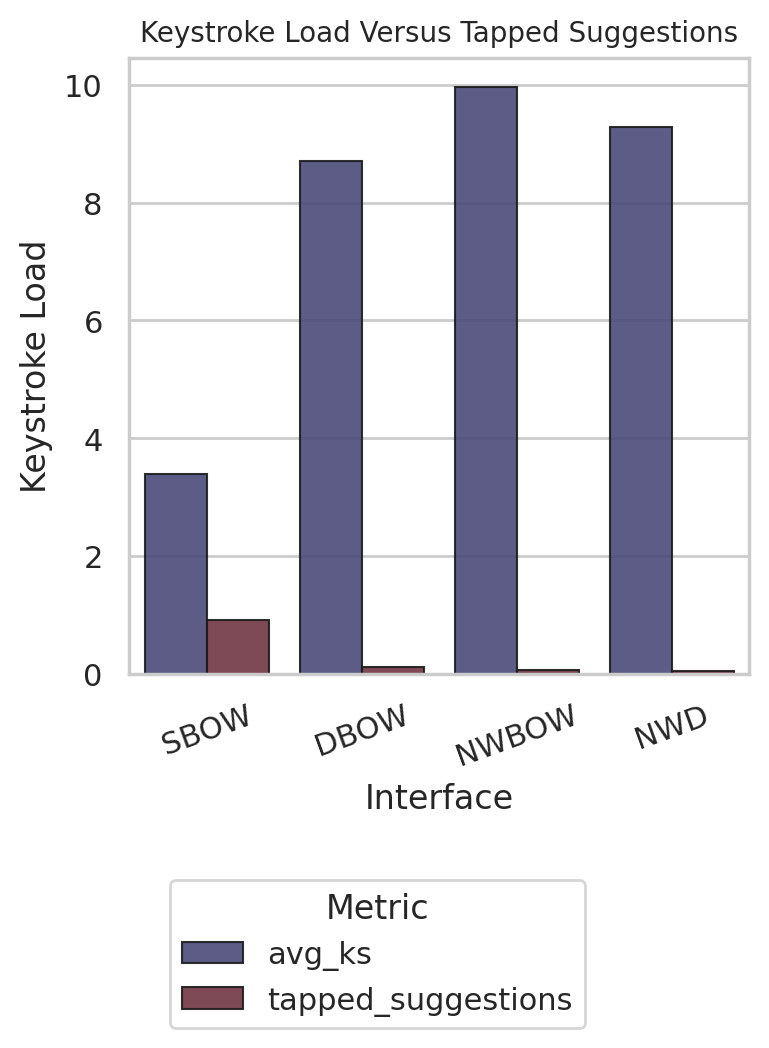

In [7]:
rows = []
tapped_rows = []
avg_SQ = []
avg_STD = []
for log in logs: 
    for key in log:
        if key not in ['B', 'PE']: 
            if len(log[key])==3:
                # rows.append([key, 'avg_time',log[key][0]])
                # rows.append([key, 'avg_nobp',log[key][1]/10])
                rows.append([key, 'avg_ks',log[key][2]/10])
            elif len(log[key]) == 1:
                rows.append([key, 'tapped_suggestions',log[key][0]])
            elif len(log[key]) == 2 and log[key][0] == 'Avg SQ':
                tapped_rows.append([key, 'Avg SQ',log[key][1]])
                # rows.append([key, 'Avg SQ',log[key][1]])
            elif len(log[key]) == 2 and log[key][0] == 'Avg STD':
                tapped_rows.append([key, 'Avg STD',log[key][1]])
                # rows.append([key, 'Avg STD',log[key][1]])
df = pd.DataFrame(rows, columns = ['Interface', 'Metric', 'Keystroke Load'])
print(df)
plot = sns.barplot(df, x = 'Interface', y = 'Keystroke Load', hue = 'Metric', errorbar = 'sd', palette= 'icefire', linewidth = 0.75, edgecolor = 'k', alpha = 0.9)
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.title("Keystroke Load Versus Tapped Suggestions",  y=1.0, fontsize = 10)
sns.move_legend(plot, "lower center", bbox_to_anchor=(0.4, -0.6))
plot.set_xticklabels(['SBOW', 'DBOW', 'NWBOW', 'NWD'], rotation = 20)
plt.savefig('./results/plots/tapped_suggestions.png', bbox_inches='tight')


<Axes: xlabel='Interface', ylabel='Tapped Idx'>

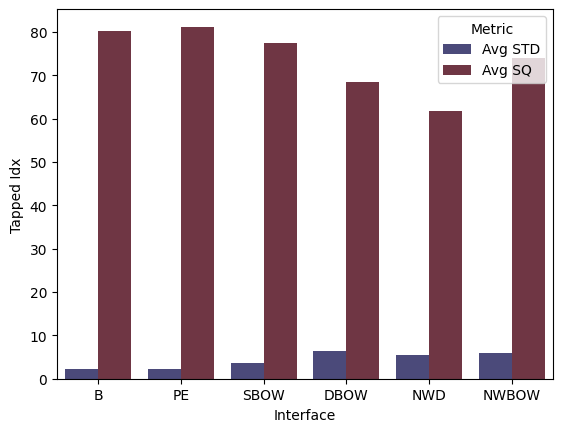

In [5]:
tapped_df = pd.DataFrame(tapped_rows, columns = ['Interface','Metric','Tapped Idx'])
sns.barplot(tapped_df, x = 'Interface', y = 'Tapped Idx', hue = 'Metric', errorbar = 'sd', palette = 'icefire')

Past palletes - "GnBu_d", "coolwarm"

In [24]:
rows

[['B', 'Avg STD', 2.2966507177033493],
 ['PE', 'Avg STD', 2.3444976076555024],
 ['SBOW', 'Avg STD', 3.5526315789473686],
 ['DBOW', 'Avg STD', 6.471291866028708],
 ['NWD', 'Avg STD', 5.490430622009569],
 ['NWBOW', 'Avg STD', 5.956937799043062],
 ['NWD', 'Avg SQ', 61.758893280632414],
 ['NWBOW', 'Avg SQ', 73.99876084262701],
 ['DBOW', 'Avg SQ', 68.50671140939598],
 ['SBOW', 'Avg SQ', 77.46735751295337],
 ['B', 'Avg SQ', 80.25507246376812],
 ['PE', 'Avg SQ', 81.18192918192918],
 ['B', 'avg_time', 4.738776594650206],
 ['B', 'avg_nobp', 2.1412037037037037],
 ['B', 'avg_ks', 9.41466049382716],
 ['PE', 'avg_time', 1.101664531893004],
 ['PE', 'avg_nobp', 0.4932098765432099],
 ['PE', 'avg_ks', 1.3358024691358026],
 ['SBOW', 'avg_time', 1.7898406378600824],
 ['SBOW', 'avg_nobp', 0.600925925925926],
 ['SBOW', 'avg_ks', 3.399074074074074],
 ['DBOW', 'avg_time', 3.9208554353426073],
 ['DBOW', 'avg_nobp', 1.7216383307573415],
 ['DBOW', 'avg_ks', 8.698145285935086],
 ['NWBOW', 'avg_time', 2.198277777

In [26]:
print(avg_time)

[['B', 4.738776594650206], ['PE', 1.101664531893004], ['SBOW', 1.7898406378600824], ['DBOW', 3.9208554353426073], ['NWBOW', 2.1982777777777778], ['NWD', 1.7862921840958605]]


In [47]:
print(avg_sq)

[['NWD', 61.758893280632414], ['NWBOW', 73.99876084262701], ['DBOW', 68.50671140939598], ['SBOW', 77.46735751295337], ['B', 80.25507246376812], ['PE', 81.18192918192918]]


,Interface,Value
0,NWD,61.758893
1,NWBOW,73.998761
2,DBOW,68.506711
3,SBOW,77.467358
4,B,80.255072
5,PE,81.181929


In [ ]:
avg_time, avg_nobp, avg_ks, avg_std, avg_sq = [],[],[],[],[]
group_by_metric = []
for row in rows: 
    if row[1] == 'avg_time':
        avg_time.append([row[0], row[2]])
    elif row[1] == 'avg_nobp':
        avg_nobp.append([row[0], row[2]])
    elif row[1] == 'avg_ks':
        avg_ks.append([row[0], row[2]])
    elif row[1] == 'Avg SQ':
        avg_sq.append([row[0], row[2]])
    elif row[1] == 'Avg STD':
        avg_std.append([row[0], row[2]])    
adf = pd.DataFrame(avg_time, columns = ['Interface', 'Value'])
bdf = pd.DataFrame(avg_nobp, columns = ['Interface', 'Value'])
cdf = pd.DataFrame(avg_ks, columns = ['Interface', 'Value'])
ddf = pd.DataFrame(avg_std, columns = ['Interface', 'Value'])
edf = pd.DataFrame(avg_sq, columns = ['Interface', 'Value'])

fig, axes = plt.subplots(1, 5, figsize=(10,5), constrained_layout = True)
sns.barplot(data = adf, x='Interface', y = 'Value',  ax=axes[0], palette = 'icefire', linewidth = 0.75, edgecolor = 'k', alpha = 0.96)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
axes[0].set(ylabel='Average Time Taken (sec)', xlabel='Interfaces')

sns.barplot(data = bdf, x='Interface', y = 'Value',  ax=axes[1], palette = 'icefire', linewidth = 0.75, edgecolor = 'k', alpha = 0.96)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")
axes[1].set(ylabel='Average Number of Backspaces', xlabel='Interfaces')

sns.barplot(data = cdf, x='Interface', y = 'Value',  ax=axes[2], palette = 'icefire', linewidth = 0.75, edgecolor = 'k', alpha = 0.96)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")
axes[2].set(ylabel='Average Number of Keystrokes', xlabel='Interfaces')

sns.barplot(data = ddf, x='Interface', y = 'Value',  ax=axes[3], palette = 'icefire', linewidth = 0.75, edgecolor = 'k', alpha = 0.96)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=40, ha="right")
axes[3].set(ylabel='Average STD of Inter-Annotator Assesements', xlabel='Interfaces')

sns.barplot(data = edf, x='Interface', y = 'Value',  ax=axes[4], palette = 'icefire', linewidth = 0.75, edgecolor = 'k', alpha = 0.96)
print(axes[4].get_xticklabels())
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=40, ha="right")
axes[4].set(ylabel='Average DA Score for Annotated Sentences', xlabel='Interfaces')
plt.title("Usage and Quality Statistics for INMT-Lite",  y=1.0, fontsize = 10)
plt.savefig('./results/plots/keystroke_analysis.png')


Plotting Pair-Wise CHRF and IAA per Interface

In [5]:
base = [100, 44.5, 45.9, 45, 46.6, 42.9]
pe = [44.5, 100, 82.1, 44.7, 45.8, 42.3]
sbow = [45.3, 82.9, 100, 45.1, 46.2, 43.4]
dbow = [45.8, 46.5, 46.5, 100, 46.4, 44.7]
nwbow = [45.9, 46.2, 46.2, 44.9, 100, 43.4]
nwd = [46, 46.5, 47.2, 47.1, 47.2, 100]

bleu_combined = [base, pe, sbow, dbow, nwbow, nwd]
# iaa_combined = [[1.0, 0.040919174382716195, 0.010645604395604358, 0.004833891967074844, 0.013313340603417045, 0.02127371884436835], [0.04091917438271597, 1.0, 0.27439399813011645, 0.0034309604417078754, 0.020023583836001668, 0.0010101010101010166], [0.010645604395604469, 0.27439399813011656, 1.0, 0.030358104469574543, 0.057992180829551154, 0.029453830338786124], [0.004833891967074622, 0.0034309604417078754, 0.030358104469574654, 1.0, 0.057759298797617764, 0.008950548221078547], [0.013313340603416934, 0.020023583836001557, 0.05799218082955104, 0.057759298797617764, 1.0, 0.0023090028694404685], [0.02127371884436835, 0.0010101010101009056, 0.029453830338786013, 0.008950548221078436, 0.0023090028694404685, 1.0]]
# iaa_combined = [[1.0, 0.15823232954308808, -0.005120213713267985, 0.036662742019885064, -0.041038837910134296, 0.01571314646897226], [0.15823232954308797, 1.0, 0.17648017603194655, -0.016068052930056753, 0.01645392164096504, 0.039188724647645445], [-0.005120213713267985, 0.17648017603194655, 1.0, 0.029648659908345976, 0.07639891863866966, 0.06288058457791168], [0.036662742019885064, -0.016068052930056753, 0.029648659908345976, 1.0, 0.05085259823414423, 0.006500107821693857], [-0.041038837910134296, 0.01645392164096504, 0.07639891863866977, 0.05085259823414423, 1.0, 0.06953260242354298], [0.01571314646897226, 0.039188724647645445, 0.06288058457791168, 0.006500107821693857, 0.0695326024235432, 1.0]]
iaa_combined = [[1.0, 0.5515690163886601, 0.418782509480184, 0.3922459886835397, 0.35339024405951597, 0.3319241631455371], [0.5740123789601772, 1.0, 0.5861655157379088, 0.43618127826679964, 0.4746376545037385, 0.39694064469080426], [0.40912446726400215, 0.5394158796109283, 1.0, 0.4301460558272616, 0.47413745081352354, 0.3942901326354607], [0.33333540666529754, 0.3080047682448282, 0.3605516185913431, 1.0, 0.36826225818830627, 0.31539443684450524], [0.31637719780094914, 0.3718739734032382, 0.44679278174461584, 0.4131330906489031, 1.0, 0.40339184233206515], [0.22621537173818393, 0.272826797169661, 0.3405935882947719, 0.2892567259461924, 0.34079420417956274, 1.0]]

In [15]:
import numpy as np

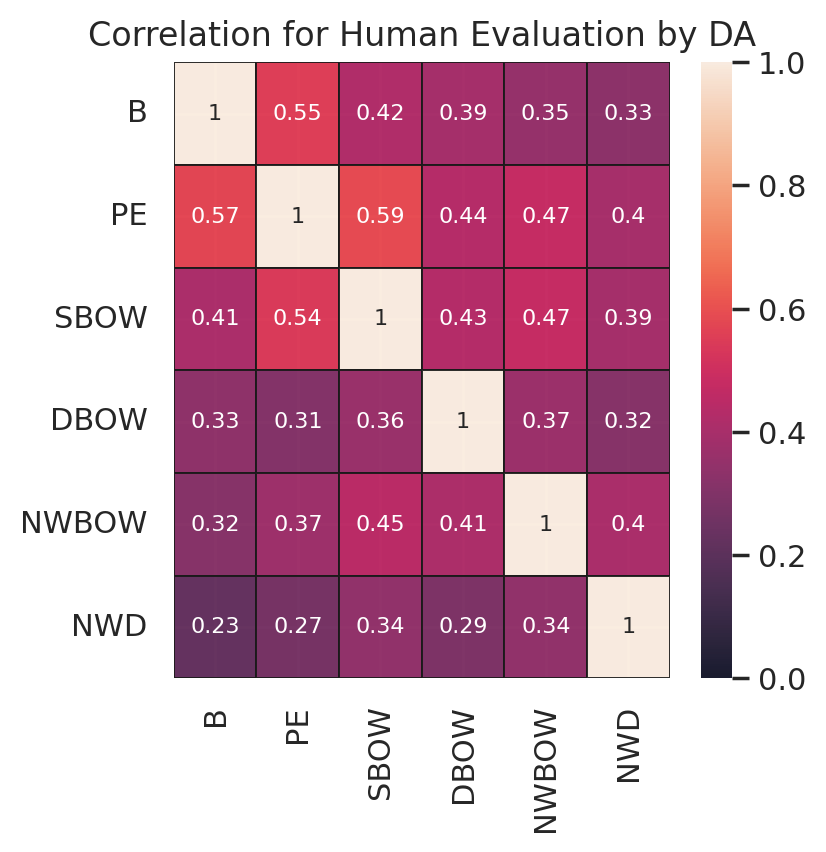

In [20]:
sns.heatmap(iaa_combined, cmap = "rocket", alpha = 0.90, annot = True, linewidths = 0.65, linecolor = 'k', vmin = 0, vmax = 1, xticklabels=['B', 'PE', 'SBOW', 'DBOW', 'NWBOW', 'NWD'], yticklabels=['B', 'PE', 'SBOW', 'DBOW', 'NWBOW', 'NWD'],annot_kws={"fontsize":8})
plt.title("Correlation for Human Evaluation by DA")
plt.savefig('./results/plots/interface_sentence_quality_da_correlation.png', bbox_inches='tight')


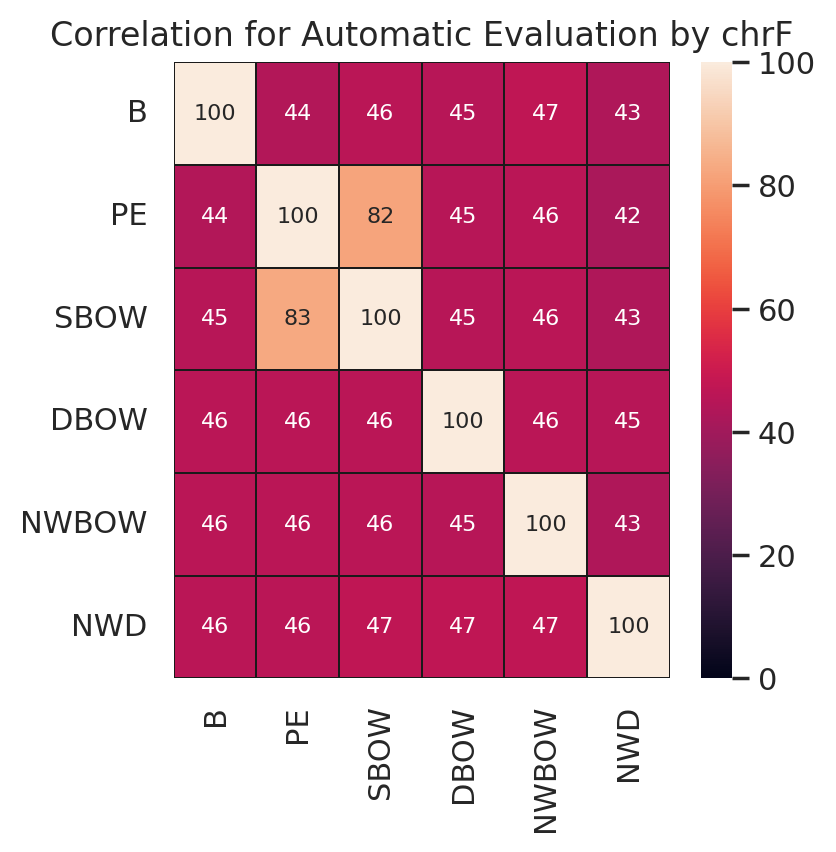

In [19]:
x_axis_labels = ['B', 'PE', 'SBOW', 'DBOW', 'NWBOW', 'NWD']
y_axis_labels = ['B', 'PE', 'SBOW', 'DBOW', 'NWBOW', 'NWD']

sns.heatmap(np.array(bleu_combined).round(0), cmap = 'rocket', vmin = 0, annot = True, linewidths = 0.65, linecolor = 'k',xticklabels = x_axis_labels, yticklabels = y_axis_labels,annot_kws={"fontsize":8}, fmt='g')
plt.title("Correlation for Automatic Evaluation by chrF")
plt.savefig('./results/plots/interface_sentence_quality_chrf_correlation.png', bbox_inches='tight')


In [48]:
##  Checking Vocabulary Overlap 
interfaces = ['B', 'PE', 'SBOW', 'DBOW', 'NWBOW', 'NWD']
unique_token_counts = [2865, 2511, 2566, 2720, 2811, 2554]
overlap = [1272, 1683, 1686, 1209, 1194, 1115]
counter = []
for element in zip(interfaces, unique_token_counts, overlap):
    counter.append((element[0], 'unique_token_counts', element[1]))
    counter.append((element[0], 'overlap', element[2]))
df = pd.DataFrame(counter, columns = ['Interface','Metric', 'Value'])

In [49]:
df

,Interface,Metric,Value
0,B,unique_token_counts,2865
1,B,overlap,1272
2,PE,unique_token_counts,2511
3,PE,overlap,1683
4,SBOW,unique_token_counts,2566
5,SBOW,overlap,1686
6,DBOW,unique_token_counts,2720
7,DBOW,overlap,1209
8,NWBOW,unique_token_counts,2811
9,NWBOW,overlap,1194


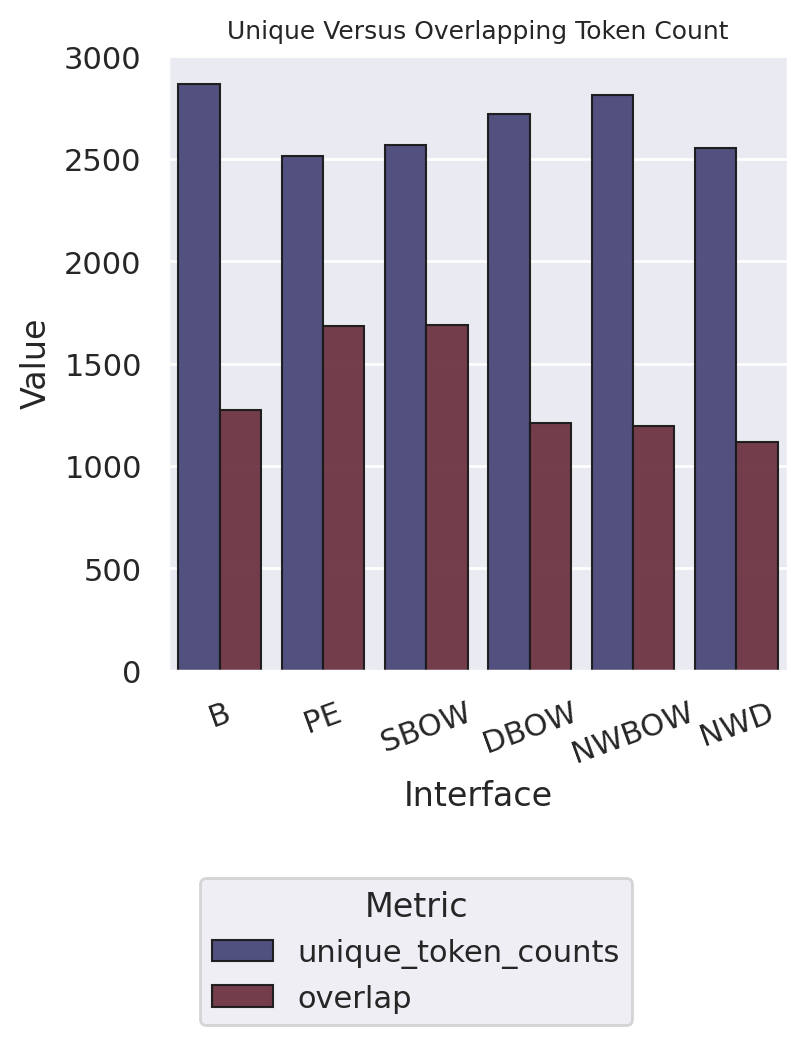

In [50]:
plot = sns.barplot(df, x = 'Interface', y = 'Value', hue = 'Metric', errorbar = 'sd', palette= 'icefire', linewidth = 0.75, edgecolor = 'k', alpha = 0.96)
sns.move_legend(plot, "lower center", bbox_to_anchor=(0.4, -0.6))
plot.set_xticklabels(['B','PE', 'SBOW', 'DBOW', 'NWBOW', 'NWD'], rotation = 20)
plt.title("Unique Versus Overlapping Token Count",  y=1.0, fontsize = 9)
plt.savefig('./results/plots/oov_analysis.png', bbox_inches='tight')



# fig, axes = plt.subplots(1, 2, figsize=(10,5), constrained_layout = True)
# sns.barplot(data = df, x='Interface', y = 'Unique Token Count',  ax=axes[0], palette = 'icefire', linewidth = 0.75, edgecolor = 'k', alpha = 0.96)
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
# axes[0].set(ylabel='Unique Token Count', xlabel='Interfaces')

# sns.barplot(data = df, x='Interface', y = 'Overlap',  ax=axes[1], palette = 'icefire', linewidth = 0.75, edgecolor = 'k', alpha = 0.96)
# axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")
# axes[1].set(ylabel='Overlap', xlabel='Interfaces')

